In [1]:
!pip install numpy matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


## Kalman Filter for Tracking a Moving Object

The Kalman Filter is a powerful algorithm used in signal processing and control systems for estimating the state of a system over time. It's particularly useful in situations where data measurements are uncertain or noisy. This example demonstrates a basic implementation of the Kalman Filter to track a moving object in one dimension.

### Understanding the Code

- **Simulation Settings**:
  - The system simulates an object moving in one dimension with a constant velocity.
  - `process_variance` represents the variance in the system model, indicating how much we trust the model's predictions.
  - `measurement_variance` is the variance in the measurements, reflecting the amount of noise or uncertainty.

- **Kalman Filter Parameters**:
  - Initial estimates for the position and error are set.
  - The Kalman Filter consists of two main steps: prediction and update. The prediction step uses the system's model to predict the next state, and the update step adjusts this prediction based on new measurements.

- **Simulation Loop**:
  - In each iteration, the object's position is updated, and a new noisy measurement is generated.
  - Kalman Filter equations are applied to these measurements to estimate the actual position.

- **Plotting**:
  - The plot displays the actual position, the noisy measurements, and the Kalman Filter estimates over time.
  - This visualization helps in understanding how the Kalman Filter is able to estimate the true trajectory of the object despite the noise in measurements.

### Key Concepts

- **Kalman Gain**: A critical component of the Kalman Filter, it determines the weight given to the measurements versus the model predictions.
- **Estimation and Error Correction**: The Kalman Filter continuously corrects its estimates based on new measurements, reducing the error over time.
- **Applicability**: This algorithm is widely used in various fields like robotics, autonomous vehicles, economics, and weather forecasting for real-time estimation and prediction.

This example provides a basic understanding of how the Kalman Filter works and its effectiveness in dealing with uncertain measurements.

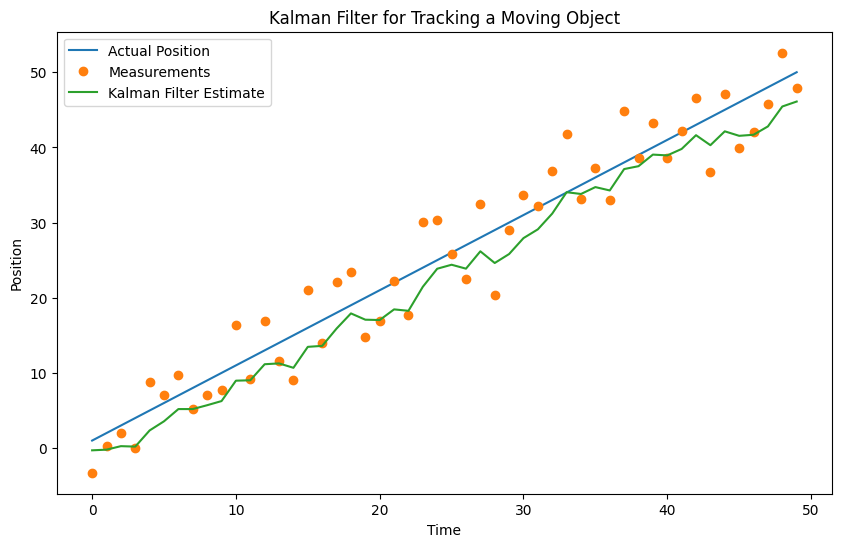

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation settings
n_iterations = 50
actual_position = 0
velocity = 1  # Constant velocity
process_variance = 1  # Variance in the process (system model)
measurement_variance = 10  # Variance in the measurements
initial_estimate = 0
initial_error_estimate = 1

# Kalman Filter parameters
estimate = initial_estimate
error_estimate = initial_error_estimate
kalman_gain = 0
process_error = process_variance
measurement_error = measurement_variance

# Arrays for plotting
positions = []
estimates = []
measurements = []

for _ in range(n_iterations):
    # Simulate the movement of the object
    actual_position += velocity
    
    # Simulate the measurement with noise
    measurement = actual_position + np.random.normal(0, np.sqrt(measurement_variance))
    
    # Kalman Filter equations
    kalman_gain = error_estimate / (error_estimate + measurement_error)
    estimate = estimate + kalman_gain * (measurement - estimate)
    error_estimate = (1 - kalman_gain) * error_estimate + process_error
    
    # Store values for plotting
    positions.append(actual_position)
    estimates.append(estimate)
    measurements.append(measurement)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(positions, label='Actual Position')
plt.plot(measurements, 'o', label='Measurements')
plt.plot(estimates, label='Kalman Filter Estimate')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Kalman Filter for Tracking a Moving Object')
plt.legend()
plt.show()


## Signal Conditioning of a Temperature Sensor

Signal conditioning is a crucial process in sensor data acquisition, involving several steps to convert the sensor's raw output into a usable form.

### Code Explanation

- **Simulating Raw Data**:
  - The raw data from a temperature sensor is simulated as a voltage signal with some noise.
  
- **Signal Conditioning Steps**:
  - **Amplification**: The raw signal is amplified to increase its magnitude, making it more suitable for processing.
  - **Filtering**: A simple moving average filter is applied to smooth out the noise in the signal.
  - **Linearization**: The voltage is converted into temperature units (Celsius) using a linear equation. This step is based on the sensor's characteristics.

- **Plotting**:
  - The plot shows the raw data, the filtered data, and the final temperature readings in Celsius.
  - This visualization helps understand the effect of each signal conditioning step on the raw sensor output.

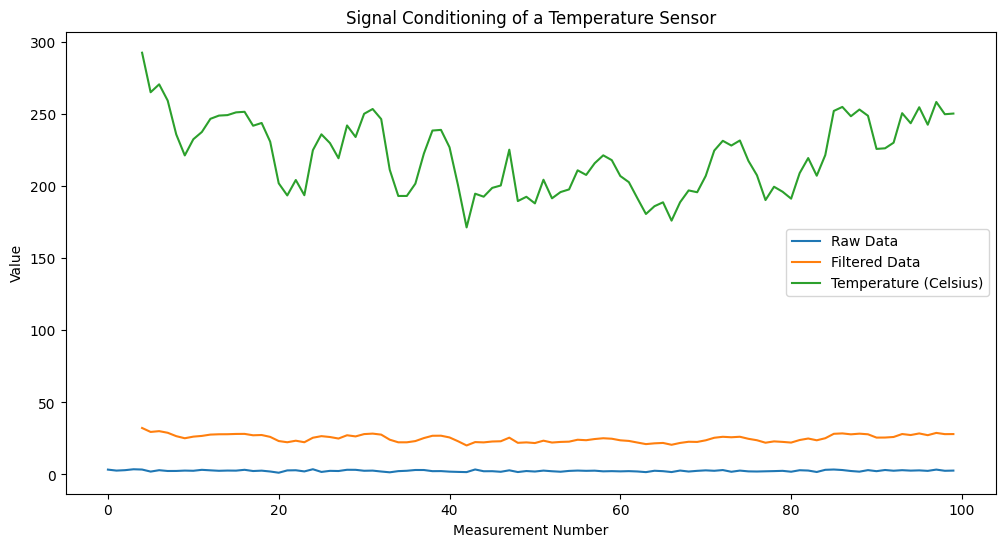

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate raw temperature sensor data (in volts)
np.random.seed(0)
raw_data = np.random.normal(2.5, 0.5, 100)  # Simulated sensor data in volts

# Signal Conditioning Steps
# Step 1: Amplification
amplified_data = raw_data * 10  # Amplify the signal

# Step 2: Filtering (Simple Moving Average for Smoothing)
window_size = 5
filtered_data = np.convolve(amplified_data, np.ones(window_size)/window_size, mode='valid')

# Step 3: Linearization (Convert volts to temperature)
# Assuming a linear relationship for simplicity: Temp (Celsius) = Voltage * 10 - 30
temperature_data = filtered_data * 10 - 30

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(raw_data, label='Raw Data')
plt.plot(np.arange(window_size-1, len(raw_data)), filtered_data, label='Filtered Data')
plt.plot(np.arange(window_size-1, len(raw_data)), temperature_data, label='Temperature (Celsius)')
plt.xlabel('Measurement Number')
plt.ylabel('Value')
plt.title('Signal Conditioning of a Temperature Sensor')
plt.legend()
plt.show()


## Sensor Calibration

Sensor calibration is essential to ensure the accuracy of sensor measurements by aligning them with known reference values.

### Code Explanation

- **Simulated Data**:
  - Simulated sensor data represents the readings obtained from the sensor.
  - Reference values are known accurate measurements used for calibration.

- **Calibration Process**:
  - A linear fit is applied between the sensor data and the reference values.
  - This fit helps correct discrepancies in the sensor readings.

- **Plotting**:
  - The scatter plot shows the relationship between the sensor data and the reference values.
  - The calibration fit line illustrates how the sensor readings are aligned with the reference values.
  - This visualization demonstrates the calibration process and its impact on sensor data accuracy.


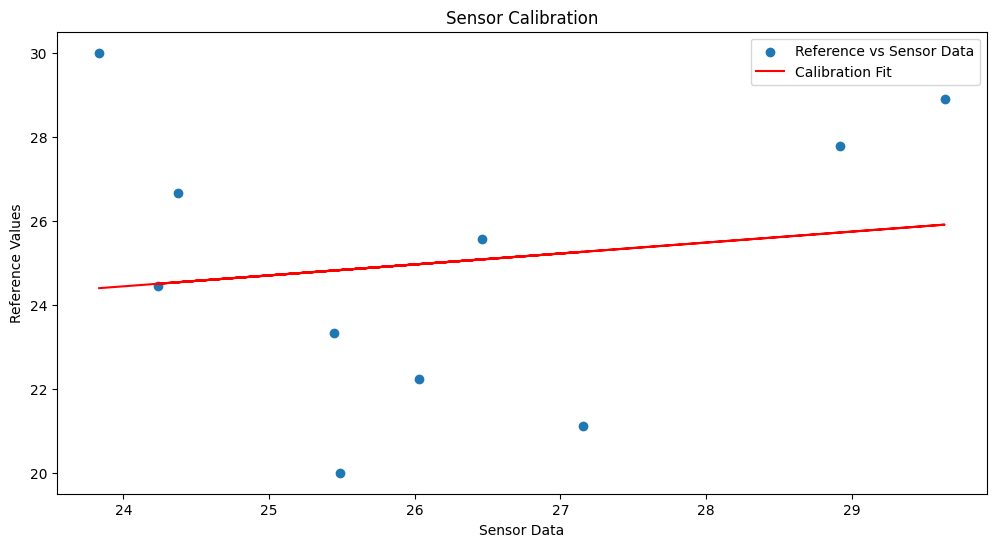

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate sensor data and reference values
np.random.seed(0)
sensor_data = np.random.uniform(20, 30, 10)  # Simulated sensor measurements
reference_values = np.linspace(20, 30, 10)  # Known reference values

# Calibration using a linear fit
coefficients = np.polyfit(sensor_data, reference_values, 1)
calibrated_sensor_data = np.polyval(coefficients, sensor_data)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(sensor_data, reference_values, label='Reference vs Sensor Data')
plt.plot(sensor_data, calibrated_sensor_data, color='red', label='Calibration Fit')
plt.xlabel('Sensor Data')
plt.ylabel('Reference Values')
plt.title('Sensor Calibration')
plt.legend()
plt.show()
